In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm


In [32]:
df = pd.read_csv(filepath_or_buffer='ITM_618_Group_Project_Data_FRED_Graph.csv', header=0, index_col=0,
                 infer_datetime_format=True, parse_dates=['observation_date'])

In [33]:
df.columns

Index(['10Y_3MTreasury', '10Y_3MTreasury_chg', 'real_personal income',
       'real_personal_income_chg', 'industrial_Prod', 'industrial_Prod_chg',
       'real_manu', 'real_manu_chg', 'non_farm', 'non_farm_chg'],
      dtype='object')

In [34]:
df = df.asfreq('MS')

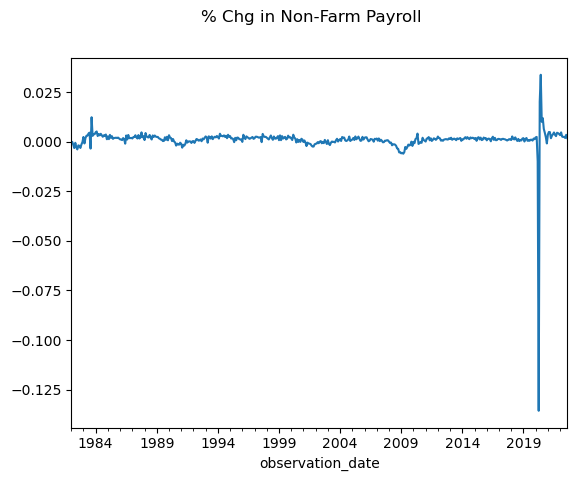

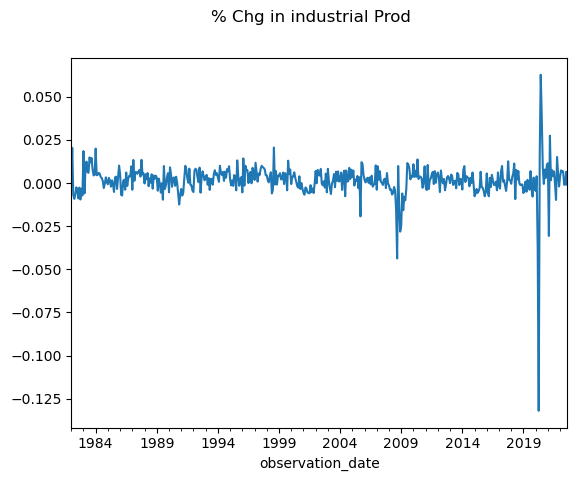

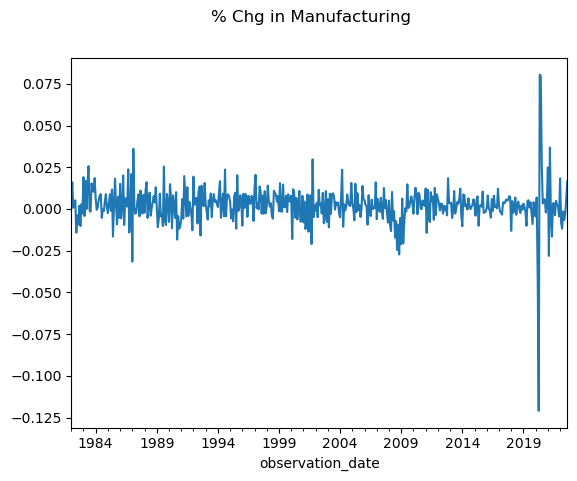

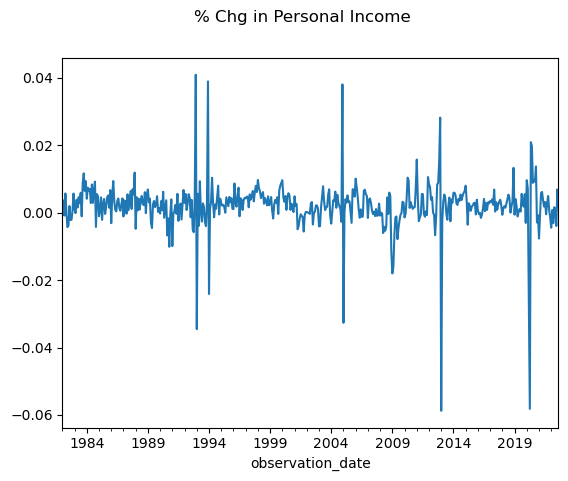

In [37]:
fig = plt.figure()
fig.suptitle('% Chg in Non-Farm Payroll')
df['non_farm_chg'].plot()
plt.show()

fig = plt.figure()
fig.suptitle('% Chg in industrial Prod')
df['industrial_Prod_chg'].plot()
plt.show()

fig = plt.figure()
fig.suptitle('% Chg in Manufacturing')
df['real_manu_chg'].plot()
plt.show()

fig = plt.figure()
fig.suptitle('% Chg in Personal Income')
df['real_personal_income_chg'].plot()
plt.show()

In [60]:
msdr_model_nonFarm = sm.tsa.MarkovRegression(endog=df['non_farm_chg'], k_regimes=2, trend='c', exog=df['10Y_3MTreasury_chg'], switching_variance=True)
 
msdr_model_results1 = msdr_model_nonFarm.fit(iter=1000)

msdr_model_perinc = sm.tsa.MarkovRegression(endog=df['real_personal_income_chg'], k_regimes=2, trend='c', exog=df['10Y_3MTreasury_chg'], switching_variance=True)
 
msdr_model_results2 = msdr_model_perinc.fit(iter=1000)

msdr_model_manuprod = sm.tsa.MarkovRegression(endog=df['real_manu_chg'], k_regimes=2, trend='c', exog=df['10Y_3MTreasury_chg'], switching_variance=True)
 
msdr_model_results3 = msdr_model_manuprod.fit(iter=1000)

msdr_model_indusprod = sm.tsa.MarkovRegression(endog=df['industrial_Prod_chg'], k_regimes=2, trend='c', exog=df['10Y_3MTreasury_chg'], switching_variance=True)
 
msdr_model_results4 = msdr_model_indusprod.fit(iter=1000)

print(msdr_model_results1.summary())
print(msdr_model_results2.summary())
print(msdr_model_results3.summary())
print(msdr_model_results4.summary())

                        Markov Switching Model Results                        
Dep. Variable:           non_farm_chg   No. Observations:                  488
Model:               MarkovRegression   Log Likelihood                2411.940
Date:                Fri, 25 Nov 2022   AIC                          -4807.880
Time:                        18:02:09   BIC                          -4774.358
Sample:                    01-01-1982   HQIC                         -4794.713
                         - 08-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013   7.08e-05     18.880      0.000       0.001       0.001
x1            -0.0023      0.001     -4.489      0.0

In [61]:
df_r = pd.read_csv('ITM_618_Group_Project_Data_FRED_Graph.csv', header=0, index_col=0, infer_datetime_format=True, parse_dates=['observation_date'])

[Text(0.5, 1.0, 'Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')]

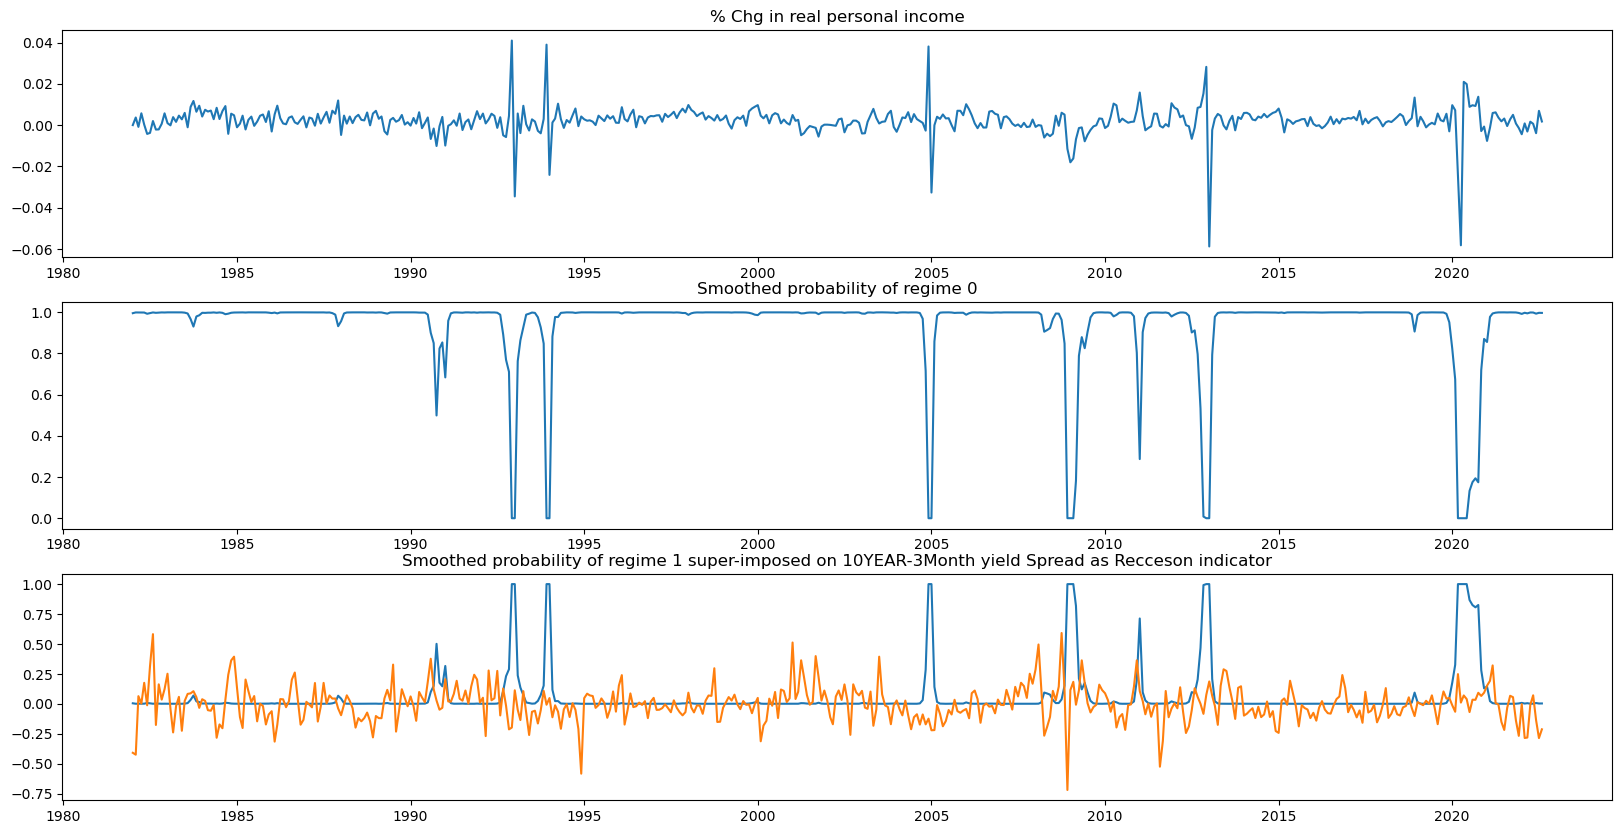

In [100]:

figure, axes = plt.subplots(3, figsize=(20,10)) 

ax = axes[0]
ax.plot(df.index, df['real_personal_income_chg'])
ax.set(title='% Chg in real personal income')

ax = axes[1]
ax.plot(df.index, msdr_model_results2.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0', )

ax = axes[2]
ax.plot(df.index, msdr_model_results2.smoothed_marginal_probabilities[1])
ax.plot(df_r.index, df_r['10Y_3MTreasury_chg'])
ax.set(title='Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')


[Text(0.5, 1.0, 'Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')]

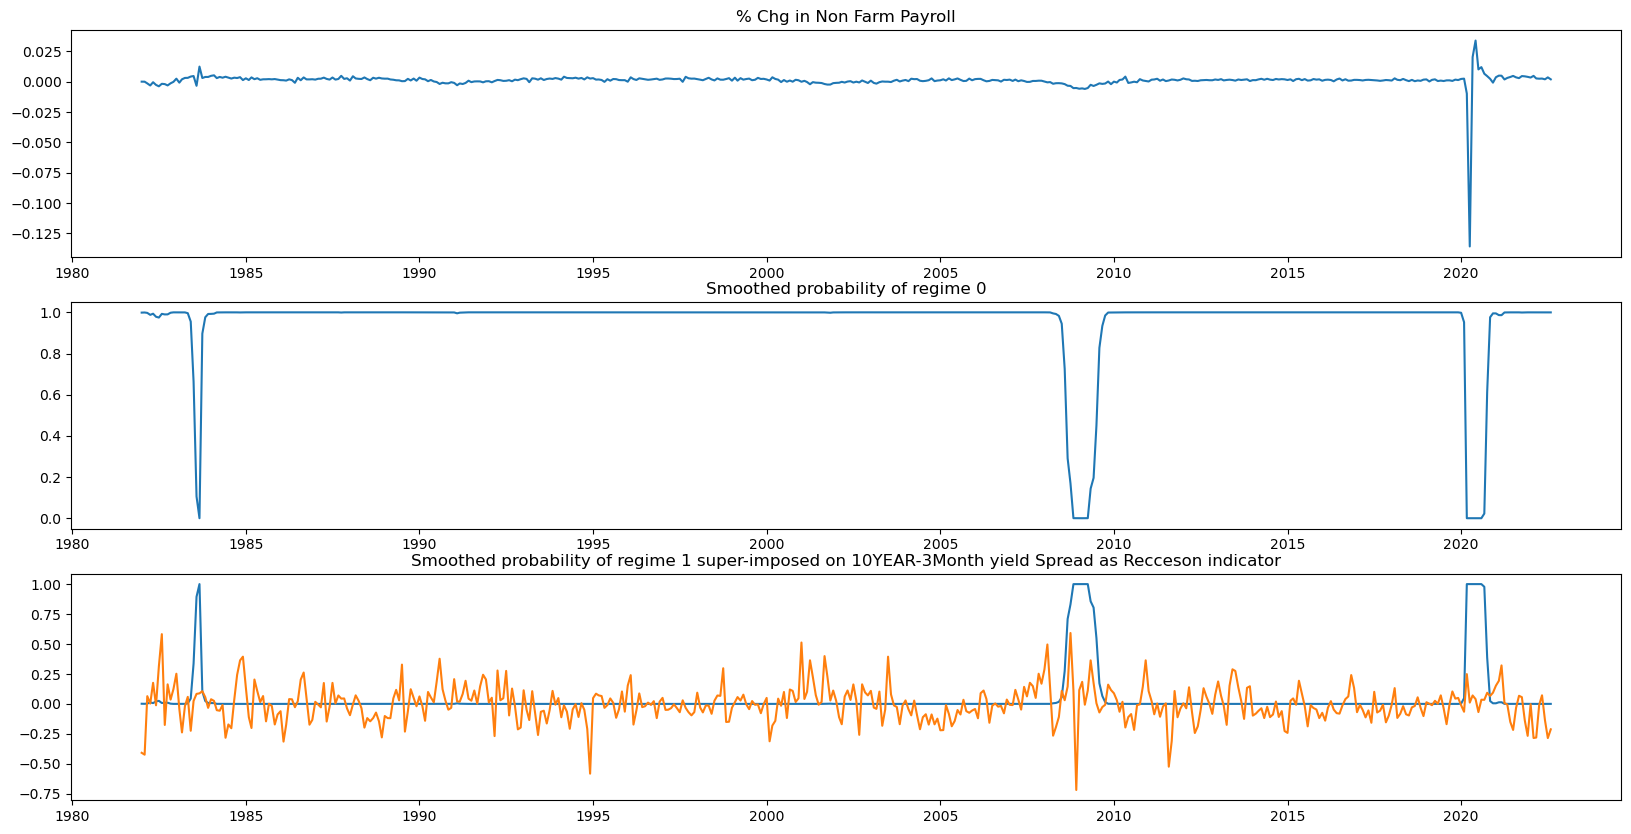

In [101]:
figure, axes = plt.subplots(3, figsize=(20,10)) 

ax = axes[0]
ax.plot(df.index, df['non_farm_chg'])
ax.set(title='% Chg in Non Farm Payroll')

ax = axes[1]
ax.plot(df.index, msdr_model_results1.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0', )

ax = axes[2]
ax.plot(df.index, msdr_model_results1.smoothed_marginal_probabilities[1])
ax.plot(df_r.index, df_r['10Y_3MTreasury_chg'])
ax.set(title='Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')